In [67]:
# вариант 13
# dx/dt = -x
# dy/dt = 1 - x^2 - ay

In [68]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

In [74]:
def func(t, f, a): # t - время, f - вектор переменных (x,y), a - параметр
  return [-1*f[0], 1-f[0]**2-a*f[1]]

In [123]:
def solver(func, a, t_st, t_end, f_0, max_step=0.05):
  def f_(t,f):
    return func(t,f,a)
  return solve_ivp(f_, (t_st, t_end), f_0, max_step=0.05)
  
def plot_phase_portrait(ax, a, x_st, x_end, x_n, y_st, y_end, y_n, t_st, t_end):
  for x in np.linspace(x_st, x_end, x_n):
      for y in np.linspace(y_st, y_end, y_n):
        sol = solver(func, a, t_st, t_end, [x, y])
        ax.plot(sol.y[0], sol.y[1], color='blue')
  
  ax.axhline(y=1/a, color='black', zorder=3)
  ax.axvline(0.0, color='black', zorder=3)
  ax.scatter(0.0, 1/a, color='red', linewidth=7.5, zorder=4)
  ax.set_title(f'Phase portrait with a = {a}')

def plot_x_y(ax, a, f_0, t_st, t_end):
  sol = solver(func, a, t_st, t_end, f_0)
  ax[0].plot(sol.t, sol.y[0], color='blue')
  ax[1].plot(sol.t, sol.y[1], color='blue')
  ax[0].set_title(f'x(t) with a = {a}')
  ax[1].set_title(f'y(t) with a = {a}')

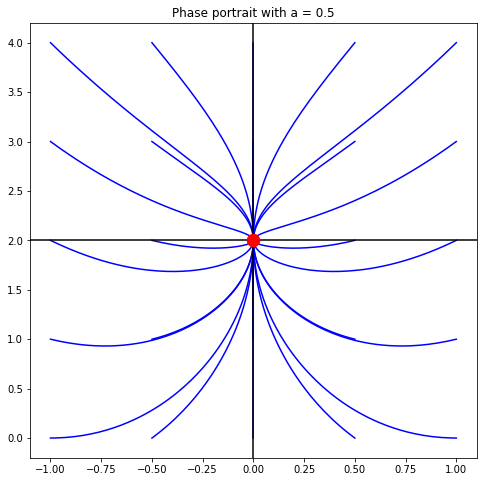

In [117]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
a = 0.5
plot_phase_portrait(ax, a, -1.0, 1.0, 5, 0.0, 4.0, 5, 0.0, 10.0)

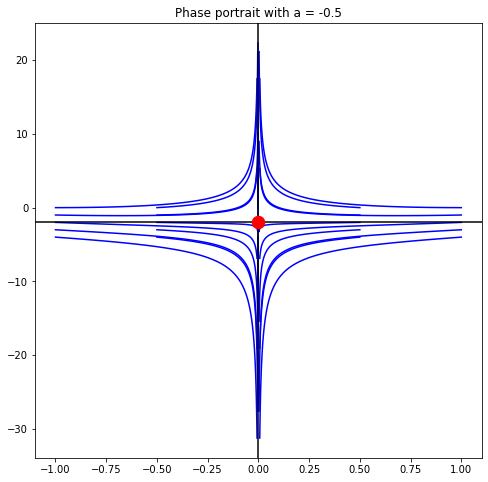

In [118]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
a = -0.5
plot_phase_portrait(ax, a, -1.0, 1.0, 5, -4.0, 0.0, 5, 0.0, 5.0)

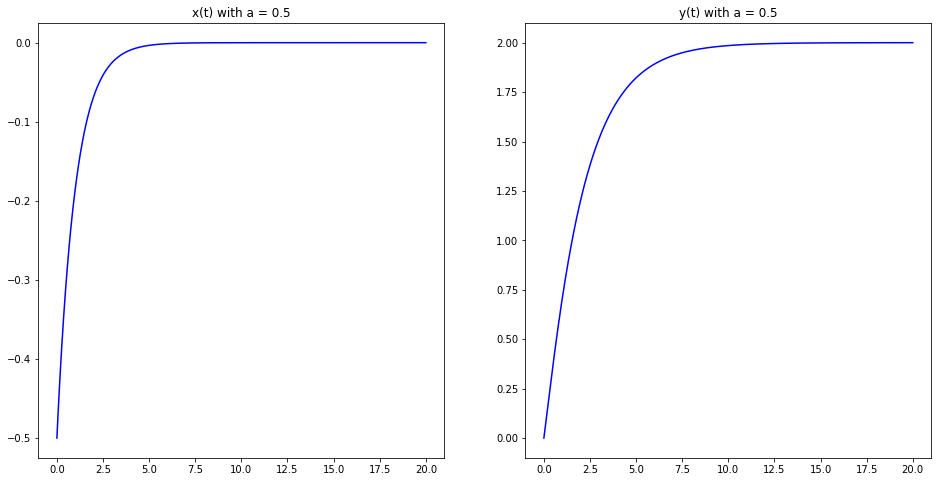

In [124]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
plot_x_y(ax, 0.5, [-0.5, 0.0], 0.0, 20.0)

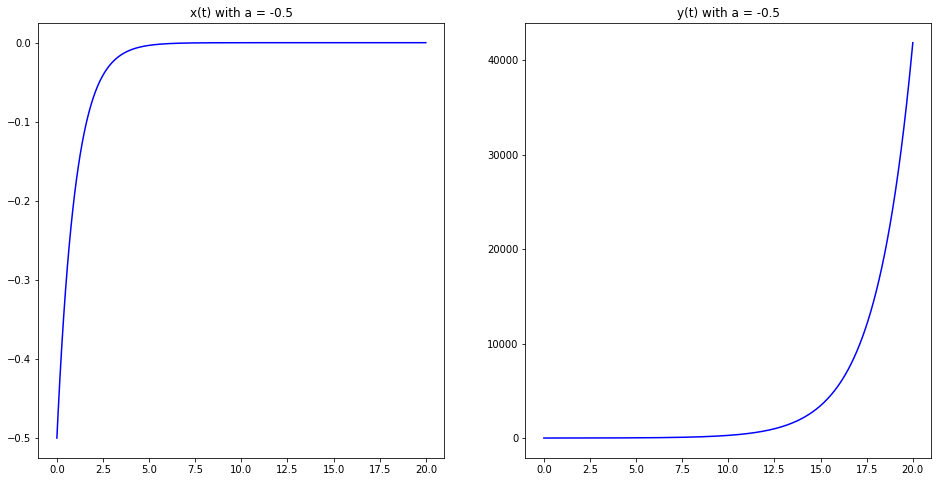

In [125]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
plot_x_y(ax, -0.5, [-0.5, 0.0], 0.0, 20.0)